In [2]:
# Import required libraries
import pandas as pd  # to load and read the dataset
import numpy as np
import matplotlib.pyplot as plt  # to plot the graphs
%matplotlib inline
import seaborn as sns  # to plot the graphs
from sklearn.model_selection import train_test_split  # to split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler  # to normalize a data
from sklearn.linear_model import LinearRegression  # to import linear regression
from sklearn import metrics  # to calculate the error of linear regression model
import matplotlib as mpl
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(rc={'grid.linewidth': 0.6, 'grid.color': 'white',
                 'axes.linewidth': 2, 'axes.facecolor': '#ECECEC',
                 'axes.labelcolor': '#000000',
                 'figure.facecolor': 'white',
                 'xtick.color': '#000000', 'ytick.color': '#000000'})

In [36]:
# Load dataset
car_data = pd.read_csv("CarPrice_Assignment.csv", encoding='unicode_escape')
car_data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [37]:
Cat_vars = []
Num_vars = []

# Categorize variables
for col in list(car_data.columns):
    if ((car_data[col].dtype == 'float64') | (car_data[col].dtype == 'int64')) & (car_data[col].nunique() > 10):
        Num_vars.append(col)
    else:
        Cat_vars.append(col)

Num_vars.remove('car_ID')
Num_vars.remove('price')
Cat_vars.remove('CarName')

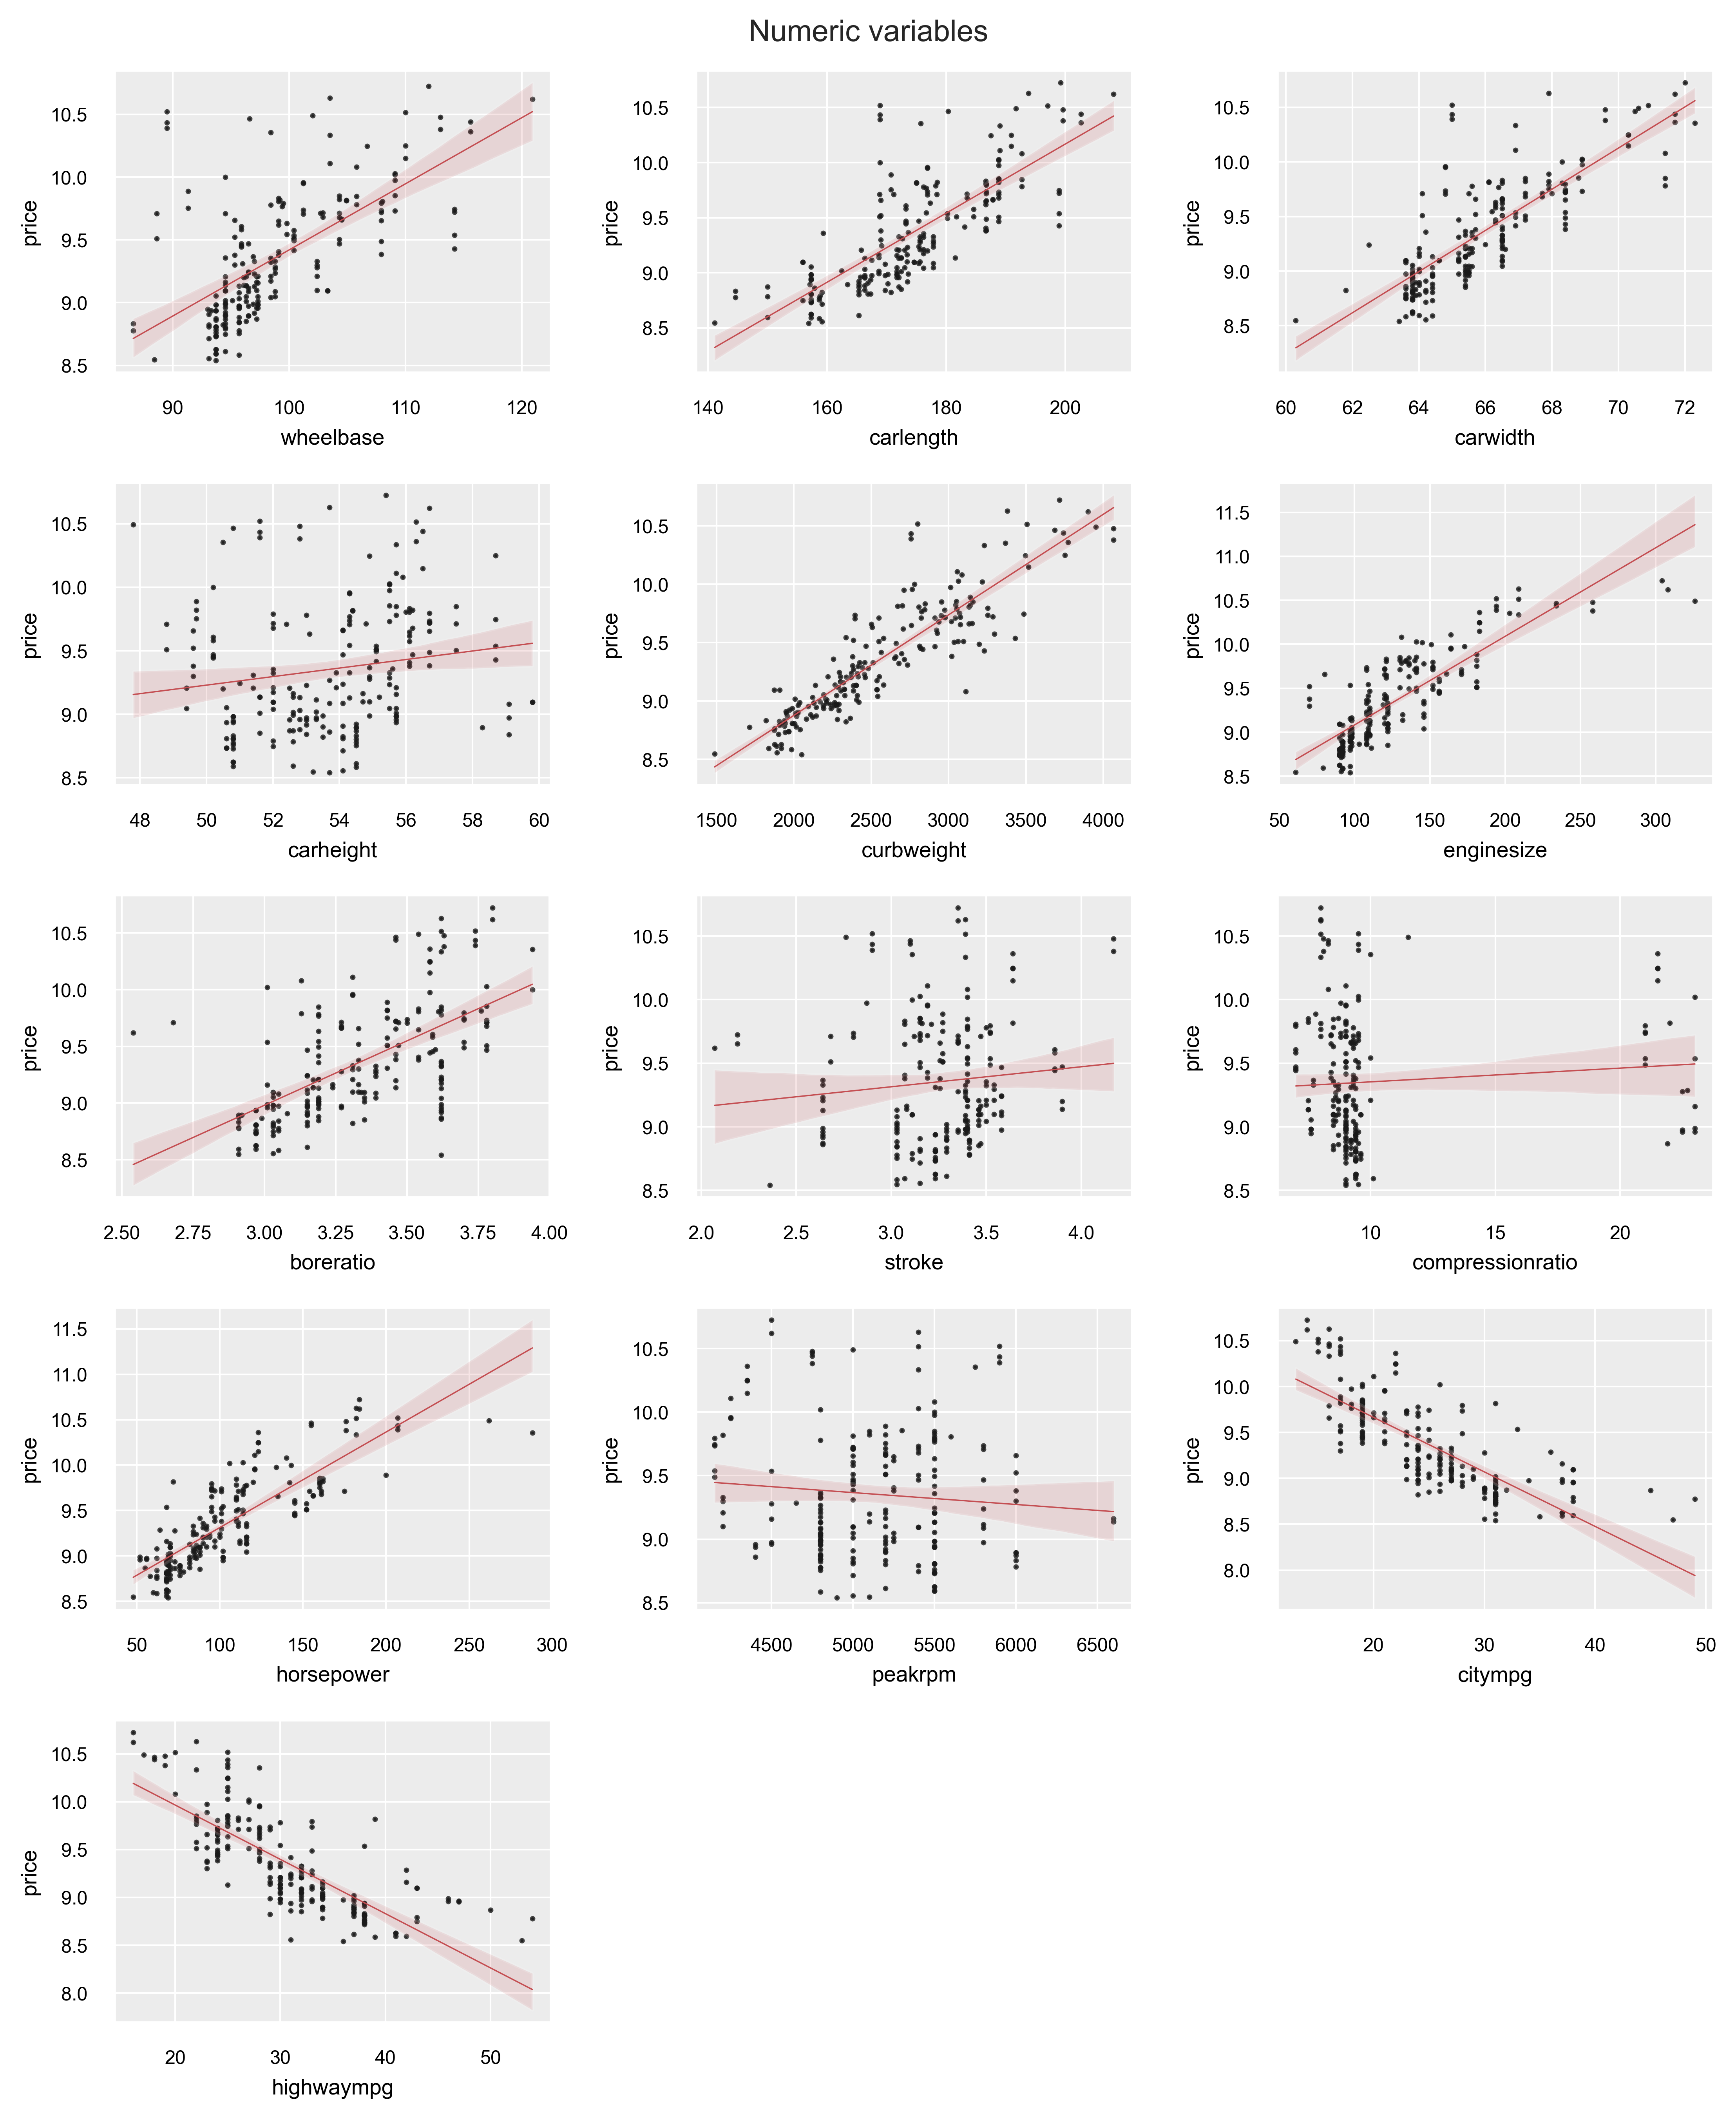

In [38]:
# Plot numeric variables
with plt.rc_context(rc={'figure.dpi': 500, 'axes.labelsize': 8,
                        'xtick.labelsize': 7, 'ytick.labelsize': 7}):
    fig_1, ax_1 = plt.subplots(5, 3, figsize=(9, 11))
    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_1.flatten()))):
        sns.regplot(ax=axes, x=car_data[column], y=np.log(car_data['price']),
                    scatter_kws={'s': 1, 'color': 'k'},
                    line_kws={'lw': 0.5, 'color': 'r'})
    else:
        [axes.set_visible(False) for axes in ax_1.flatten()[idx + 1:]]

    fig_1.suptitle('Numeric variables', fontsize=11)
    plt.tight_layout(pad=1)
    plt.show()

C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\1318964527.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(ax=axes, x=car_data[column],
C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\1318964527.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=axes, x=car_data[column],
C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\1318964527.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(ax=axes, x=car_data[column],
C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\1318964527.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.p

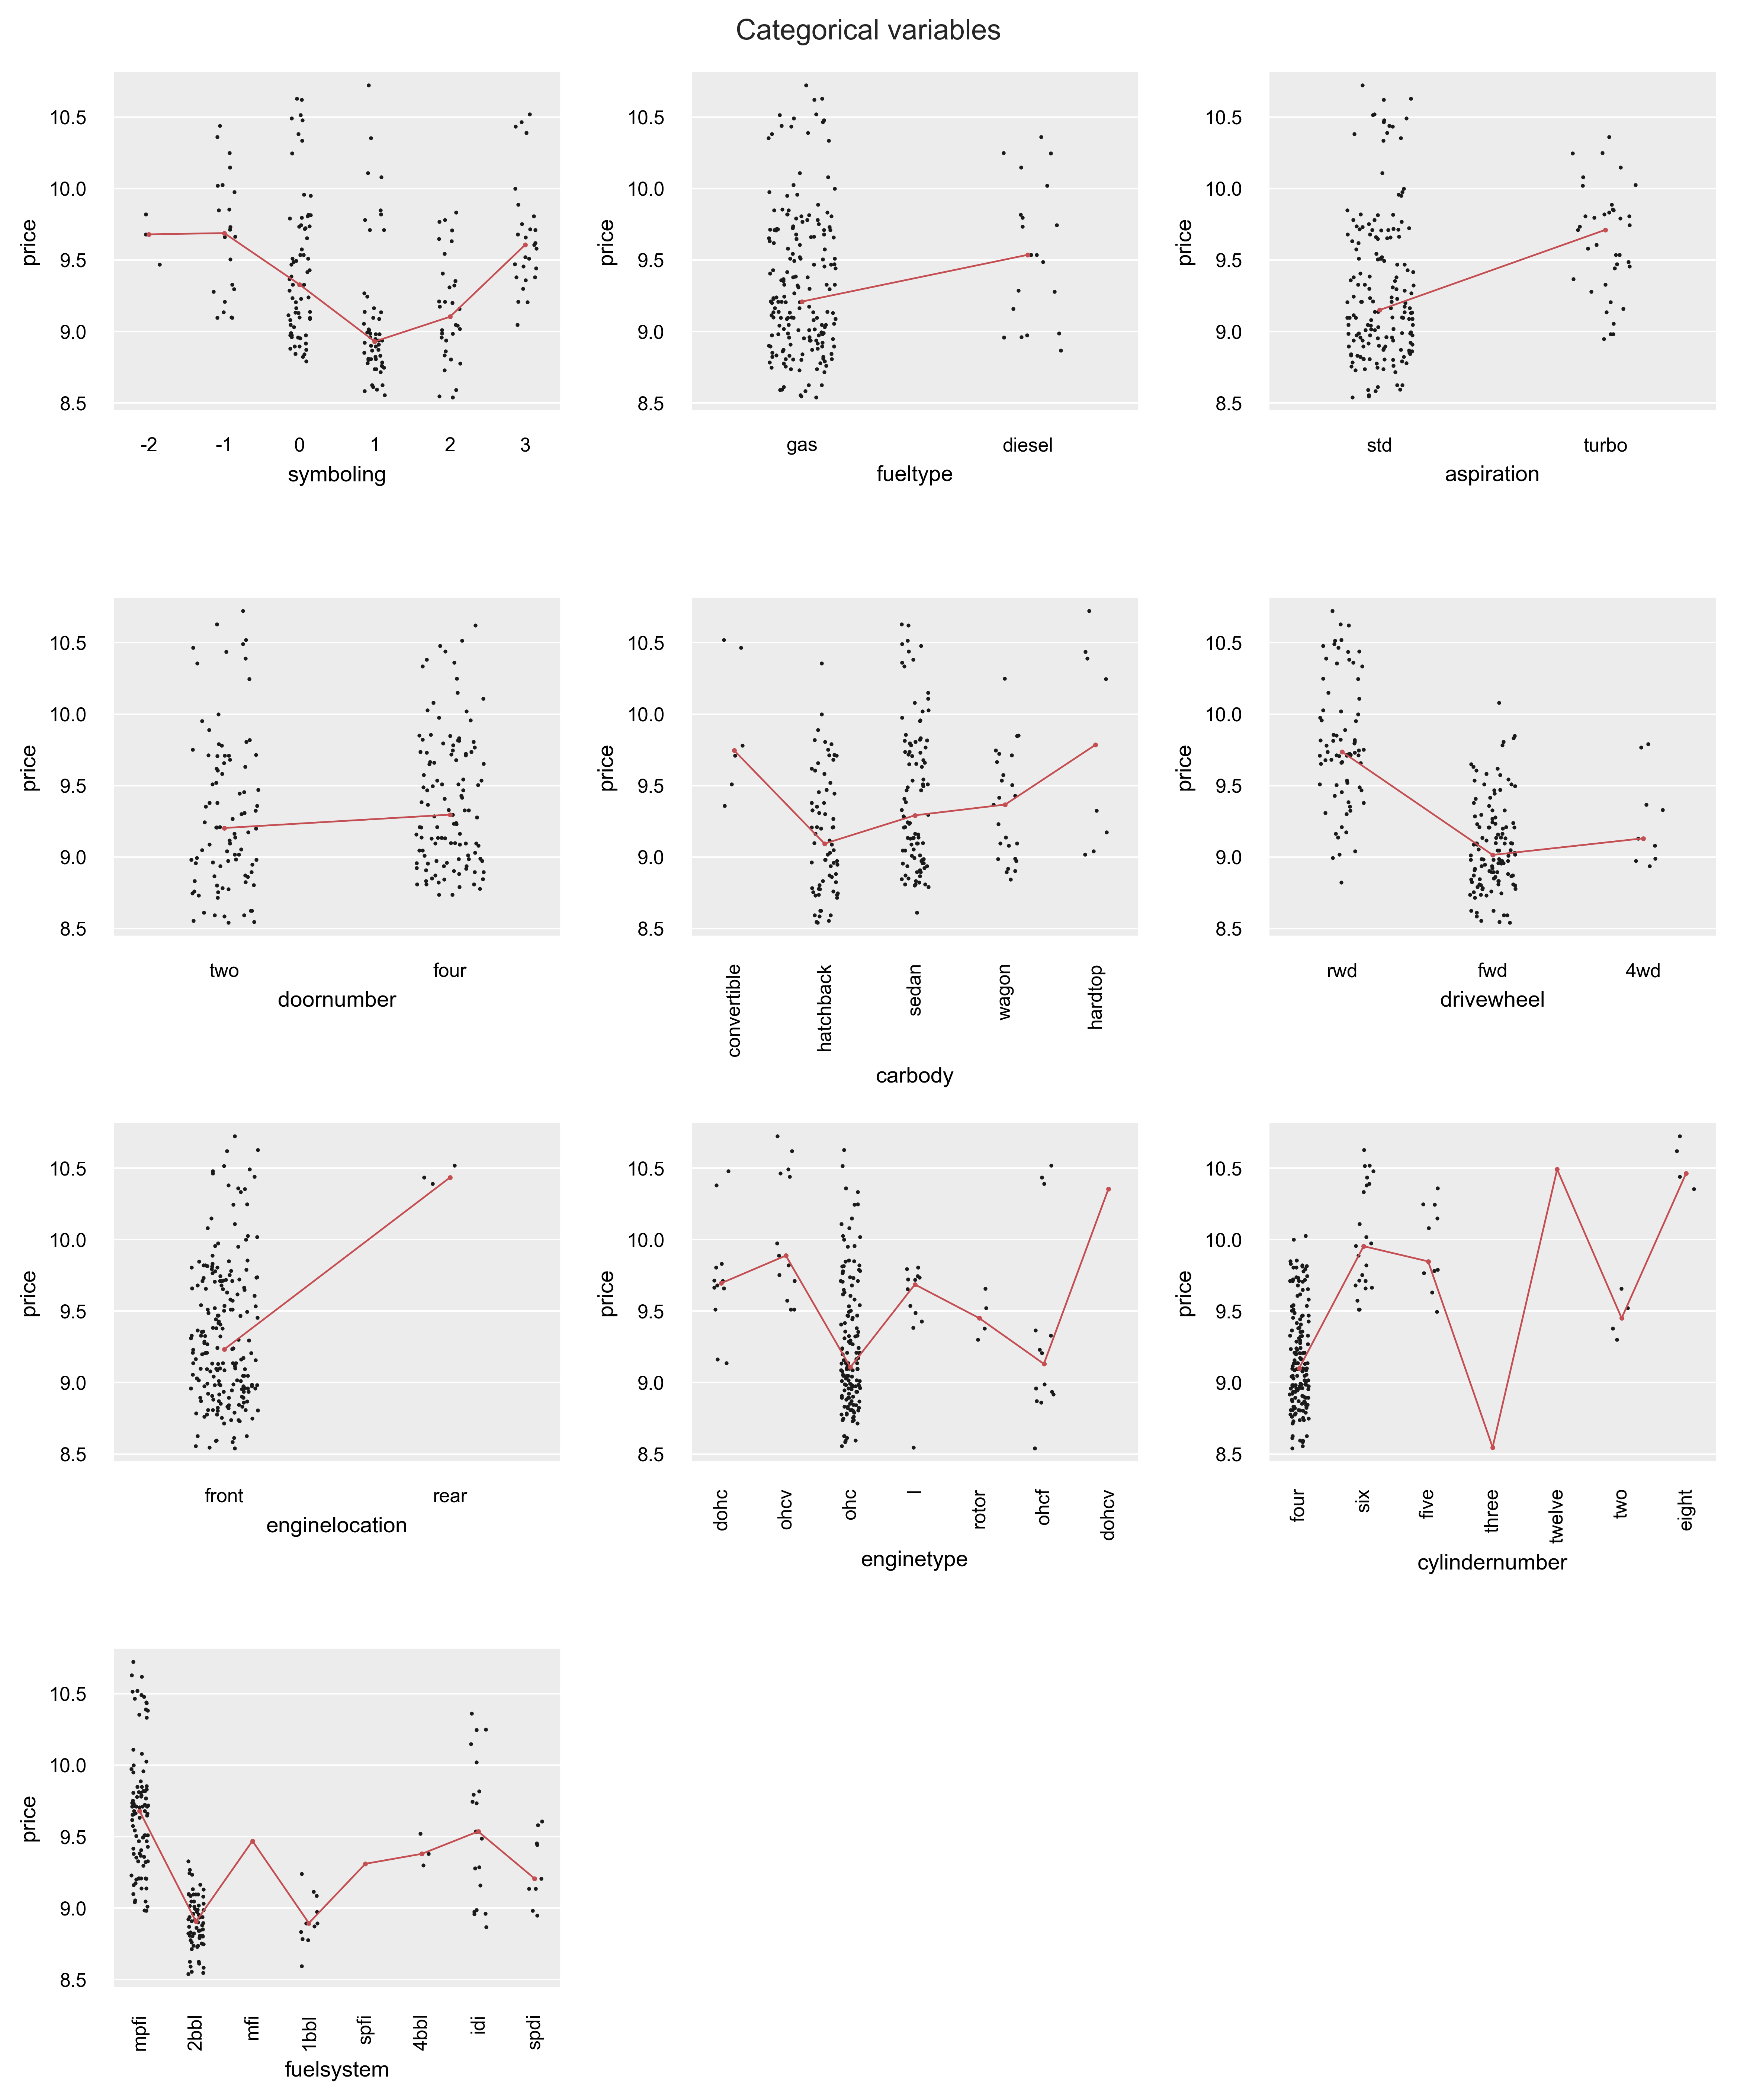

In [39]:
# Plot categorical variables
with plt.rc_context(rc={'figure.dpi': 500, 'axes.labelsize': 8.5,
                        'xtick.labelsize': 7.5, 'ytick.labelsize': 7.5}):
    fig_2, ax_2 = plt.subplots(4, 3, figsize=(9.5, 11.5))
    for idx, (column, axes) in list(enumerate(zip(Cat_vars, ax_2.flatten()))):
        plt.setp(axes.collections, alpha=0.1)
        sns.stripplot(ax=axes, x=car_data[column],
                      y=np.log(car_data['price']),
                      color='k', s=1.5, alpha=1,
                      jitter=0.15)
        sns.pointplot(ax=axes, x=car_data[column],
                      y=np.log(car_data['price']),
                      color='r', scale=0.25,
                      estimator=np.median,
                      join=True, errwidth=0)
        plt.setp(axes.lines, zorder=100)
        plt.setp(axes.collections, zorder=100)
        if (car_data[column].dtypes == 'O') & (car_data[column].nunique() > 4):
            plt.setp(axes.get_xticklabels(), rotation=90)
    else:
        [axes.set_visible(False) for axes in ax_2.flatten()[idx + 1:]]

    fig_2.suptitle('Categorical variables', fontsize=11)
    plt.tight_layout()
    plt.show()

In [40]:
# Display dataset info
car_data.head()
car_data.info()
car_data.isnull().sum()  # Check null values separately
car_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [41]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(car_data['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.801, p=0.000


In [42]:
# Interpret Shapiro-Wilk test
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [43]:
# Drop unnecessary columns
car_data = car_data.drop(['car_ID'], axis=1)
car_data

symboling                   CarName fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
4            2                audi 100ls      gas        std       four   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 145e (sw)      gas        std       four   
201         -1               volvo 144ea      gas      turbo       four   
202         -1               volvo 244dl      gas        std       four   
203         -1                 volvo 246   diesel      turbo       four   
204         -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0    convertible        rwd          front       88.6      168.8  ...   
1    convertible        rwd          front       88.6      168.8  ...   
2      hatchback        rwd          front       94.5      171.2  ...   
3          sedan        fwd          front       99.8      176.6  ...   
4          sedan        4wd          front       99.4      176.6  ...   
..           ...        ...            ...        ...        ...  ...   
200        sedan        rwd          front      109.1      188.8  ...   
201        sedan        rwd          front      109.1      188.8  ...   
202        sedan        rwd          front      109.1      188.8  ...   
203        sedan        rwd          front      109.1      188.8  ...   
204        sedan        rwd          front      109.1      188.8  ...   

     enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0           130        mpfi       3.47   2.68              9.0         111   
1           130        mpfi       3.47   2.68              9.0         111   
2           152        mpfi       2.68   3.47              9.0         154   
3           109        mpfi       3.19   3.40             10.0         102   
4           136        mpfi       3.19   3.40              8.0         115   
..          ...         ...        ...    ...              ...         ...   
200         141        mpfi       3.78   3.15              9.5         114   
201         141        mpfi       3.78   3.15              8.7         160   
202         173        mpfi       3.58   2.87              8.8         134   
203         145         idi       3.01   3.40             23.0         106   
204         141        mpfi       3.78   3.15              9.5         114   

    peakrpm  citympg  highwaympg    price  
0      5000       21          27  13495.0  
1      5000       21          27  16500.0  
2      5000       19          26  16500.0  
3      5500       24          30  13950.0  
4      5500       18          22  17450.0  
..      ...      ...         ...      ...  
200    5400       23          28  16845.0  
201    5300       19          25  19045.0  
202    5500       18          23  21485.0  
203    4800       26          27  22470.0  
204    5400       19          25  22625.0  

[205 rows x 25 columns]

C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\3016766563.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['price'])


<Figure size 2000x1000 with 0 Axes>

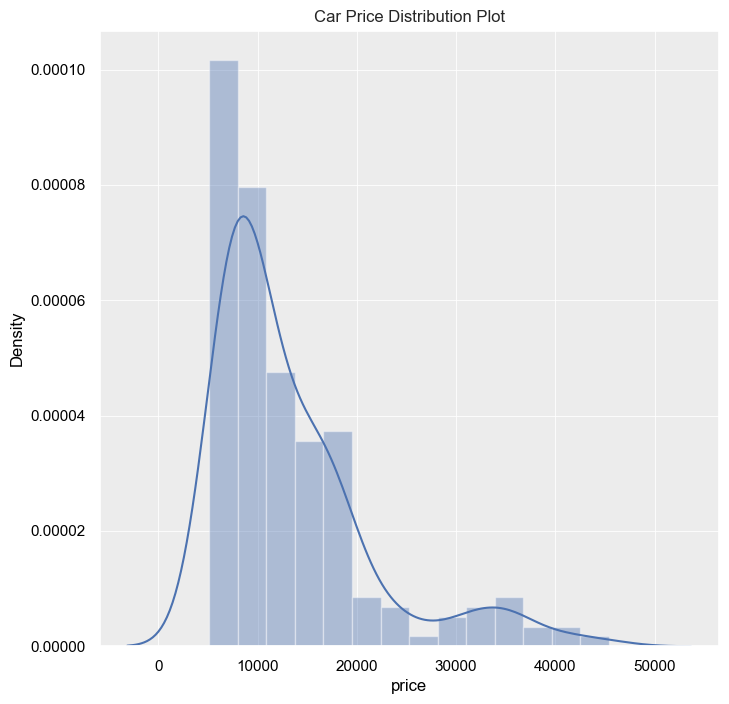

In [50]:
# Plot price distribution
plt.figure(figsize=(8, 8))
plt.title("Car Price Distribution Plot")
sns.distplot(car_data['price'])
plt.show()

In [45]:
# Value counts for categorical variables
print(car_data['CarName'].value_counts())
print(car_data['fueltype'].value_counts())
print(car_data['aspiration'].value_counts())
print(car_data['doornumber'].value_counts())
print(car_data['carbody'].value_counts())
print(car_data['drivewheel'].value_counts())
print(car_data['enginelocation'].value_counts())
print(car_data['enginetype'].value_counts())
print(car_data['cylindernumber'].value_counts())
print(car_data['fuelsystem'].value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three 

In [46]:
# Unique Car Names
car_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [47]:
# Separate categorical and numerical columns
cat_col = car_data.select_dtypes(include=['object']).columns
num_col = car_data.select_dtypes(exclude=['object']).columns
cat_col
num_col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

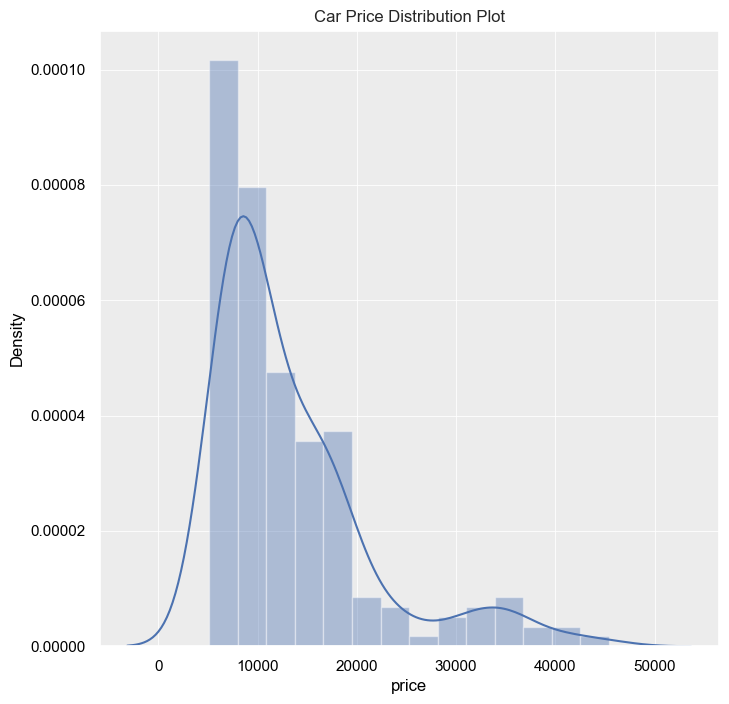

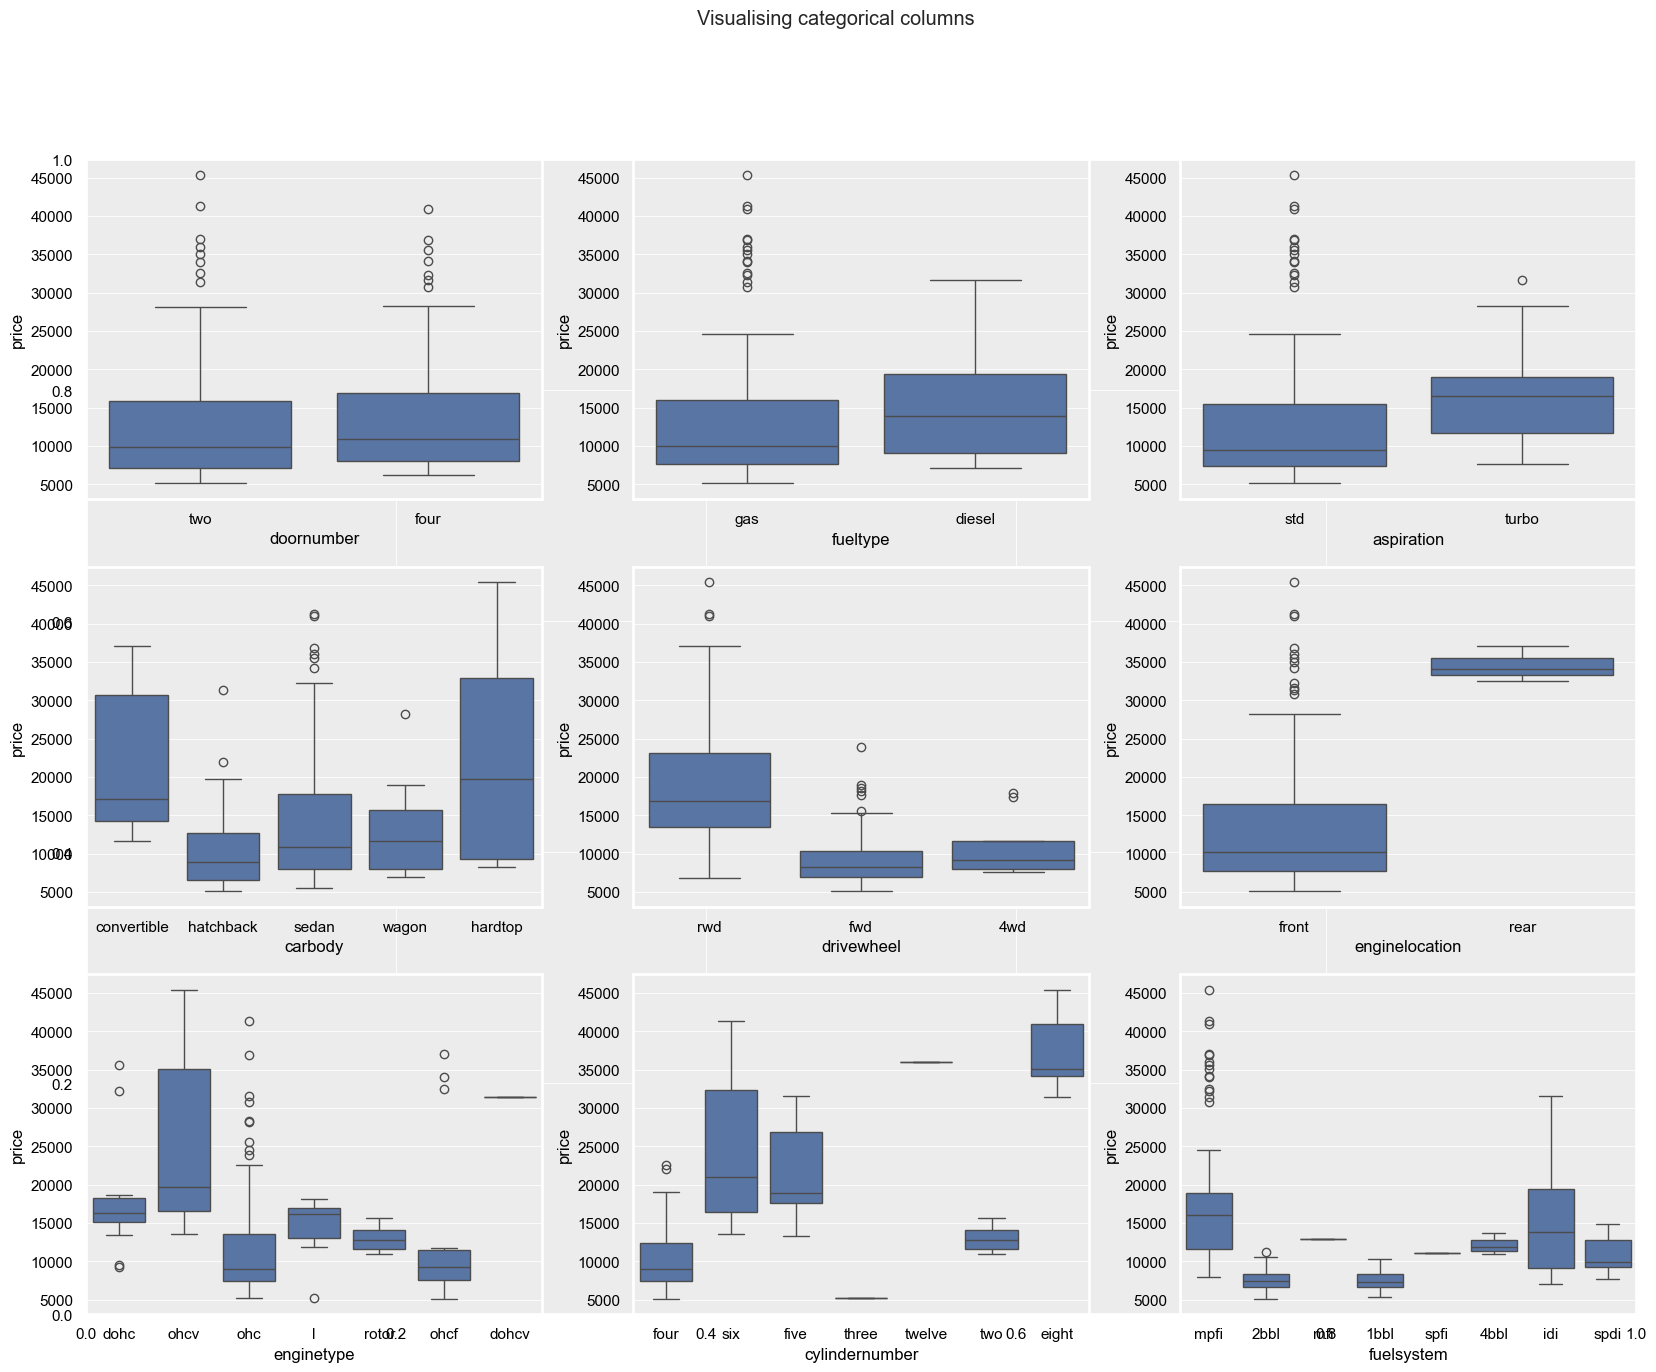

In [48]:
# Visualize categorical columns
fig, axes = plt.subplots(figsize=(20, 15))
fig.suptitle('Visualising categorical columns')
plt.subplot(3, 3, 1)
sns.boxplot(x='doornumber', y='price', data=car_data)
plt.subplot(3, 3, 2)
sns.boxplot(x='fueltype', y='price', data=car_data)
plt.subplot(3, 3, 3)
sns.boxplot(x='aspiration', y='price', data=car_data)
plt.subplot(3, 3, 4)
sns.boxplot(x='carbody', y='price', data=car_data)
plt.subplot(3, 3, 5)
sns.boxplot(x='drivewheel', y='price', data=car_data)
plt.subplot(3, 3, 6)
sns.boxplot(x='enginelocation', y='price', data=car_data)
plt.subplot(3, 3, 7)
sns.boxplot(x='enginetype', y='price', data=car_data)
plt.subplot(3, 3, 8)
sns.boxplot(x='cylindernumber', y='price', data=car_data)
plt.subplot(3, 3, 9)
sns.boxplot(x='fuelsystem', y='price', data=car_data)
plt.show()

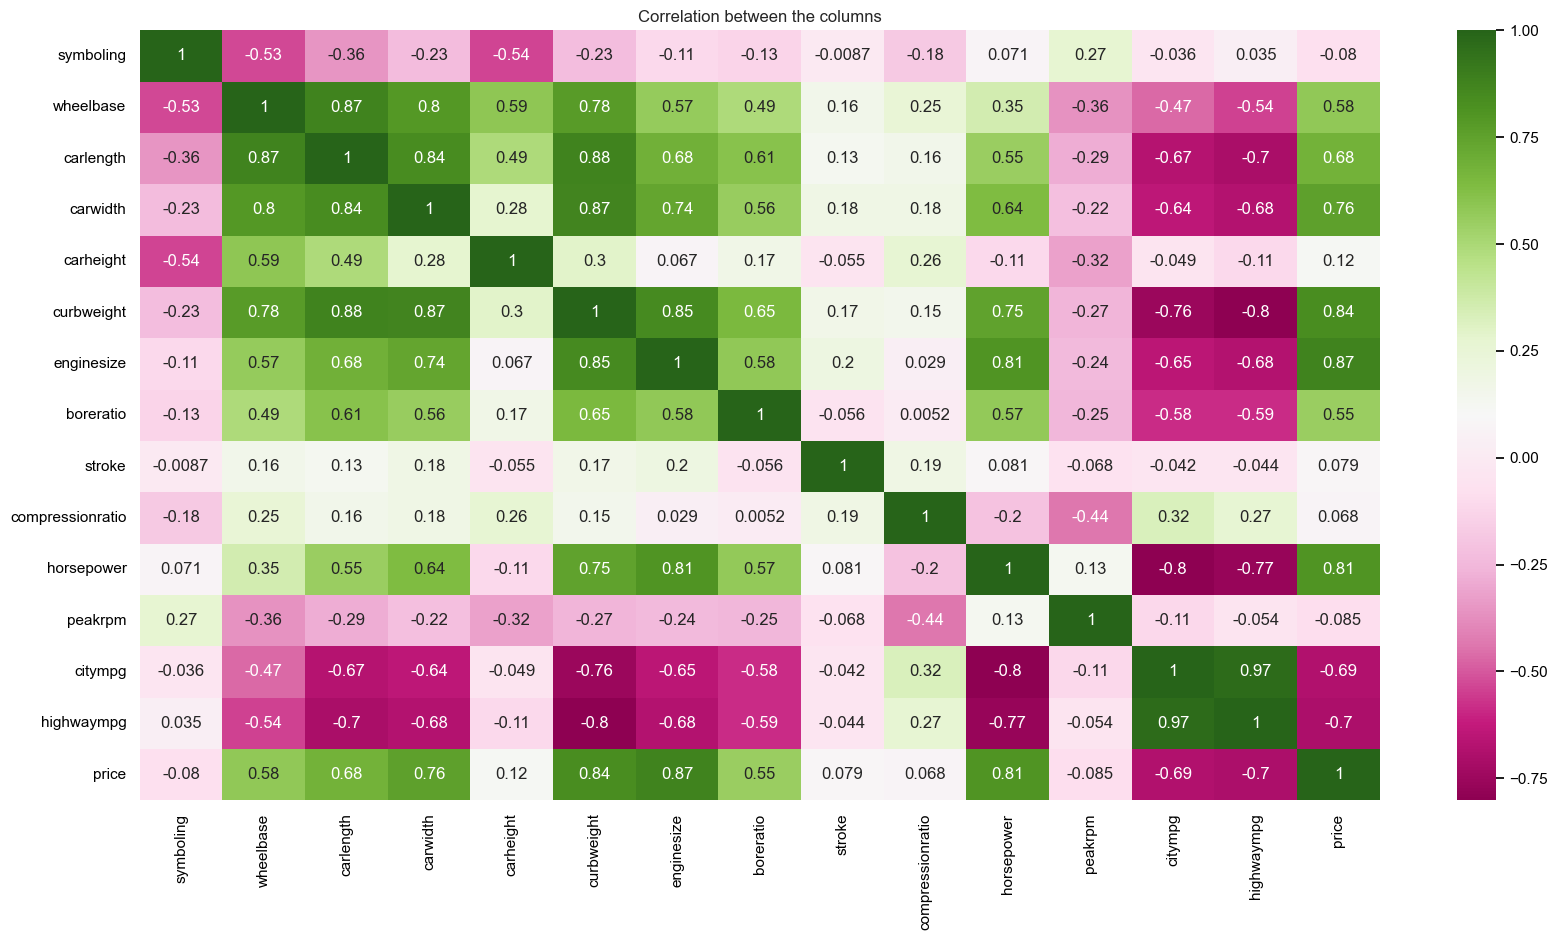

In [52]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(car_data.select_dtypes(include=['number']).corr(), cmap='PiYG', annot=True)
plt.title('Correlation between the columns')
plt.show()

In [53]:
# Calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(F):
    vif = pd.DataFrame()
    vif['Variables'] = F.columns
    vif["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
    return(vif)
F = car_data[num_col].drop(['symboling', 'price'], axis=1)
calculate_vif(F)
F = car_data[num_col].drop(['symboling', 'price', 'curbweight', 'enginesize', 'citympg', 'carwidth', 'horsepower', 'carheight', 'wheelbase', 'peakrpm', 'compressionratio'], axis=1)
calculate_vif(F)

Variables         VIF
0   carlength  295.787141
1   boreratio  220.342606
2      stroke  102.840549
3  highwaympg   17.511442

In [54]:
# Replace categorical values with numerical
car_data.replace({'cylindernumber': {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}}, inplace=True)
car_data.replace({'doornumber': {'two': 2, 'four': 4}}, inplace=True)
car_data.head()

symboling                   CarName fueltype aspiration  doornumber  \
0          3        alfa-romero giulia      gas        std           2   
1          3       alfa-romero stelvio      gas        std           2   
2          1  alfa-romero Quadrifoglio      gas        std           2   
3          2               audi 100 ls      gas        std           4   
4          2                audi 100ls      gas        std           4   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke  compressionratio  horsepower  \
0         130        mpfi       3.47   2.68               9.0         111   
1         130        mpfi       3.47   2.68               9.0         111   
2         152        mpfi       2.68   3.47               9.0         154   
3         109        mpfi       3.19   3.40              10.0         102   
4         136        mpfi       3.19   3.40               8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [55]:
# Get dummies for categorical variables
data = pd.get_dummies(car_data, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], drop_first=True)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   CarName              205 non-null    object 
 2   doornumber           205 non-null    int64  
 3   wheelbase            205 non-null    float64
 4   carlength            205 non-null    float64
 5   carwidth             205 non-null    float64
 6   carheight            205 non-null    float64
 7   curbweight           205 non-null    int64  
 8   cylindernumber       205 non-null    int64  
 9   enginesize           205 non-null    int64  
 10  boreratio            205 non-null    float64
 11  stroke               205 non-null    float64
 12  compressionratio     205 non-null    float64
 13  horsepower           205 non-null    int64  
 14  peakrpm              205 non-null    int64  
 15  citympg              205 non-null    int

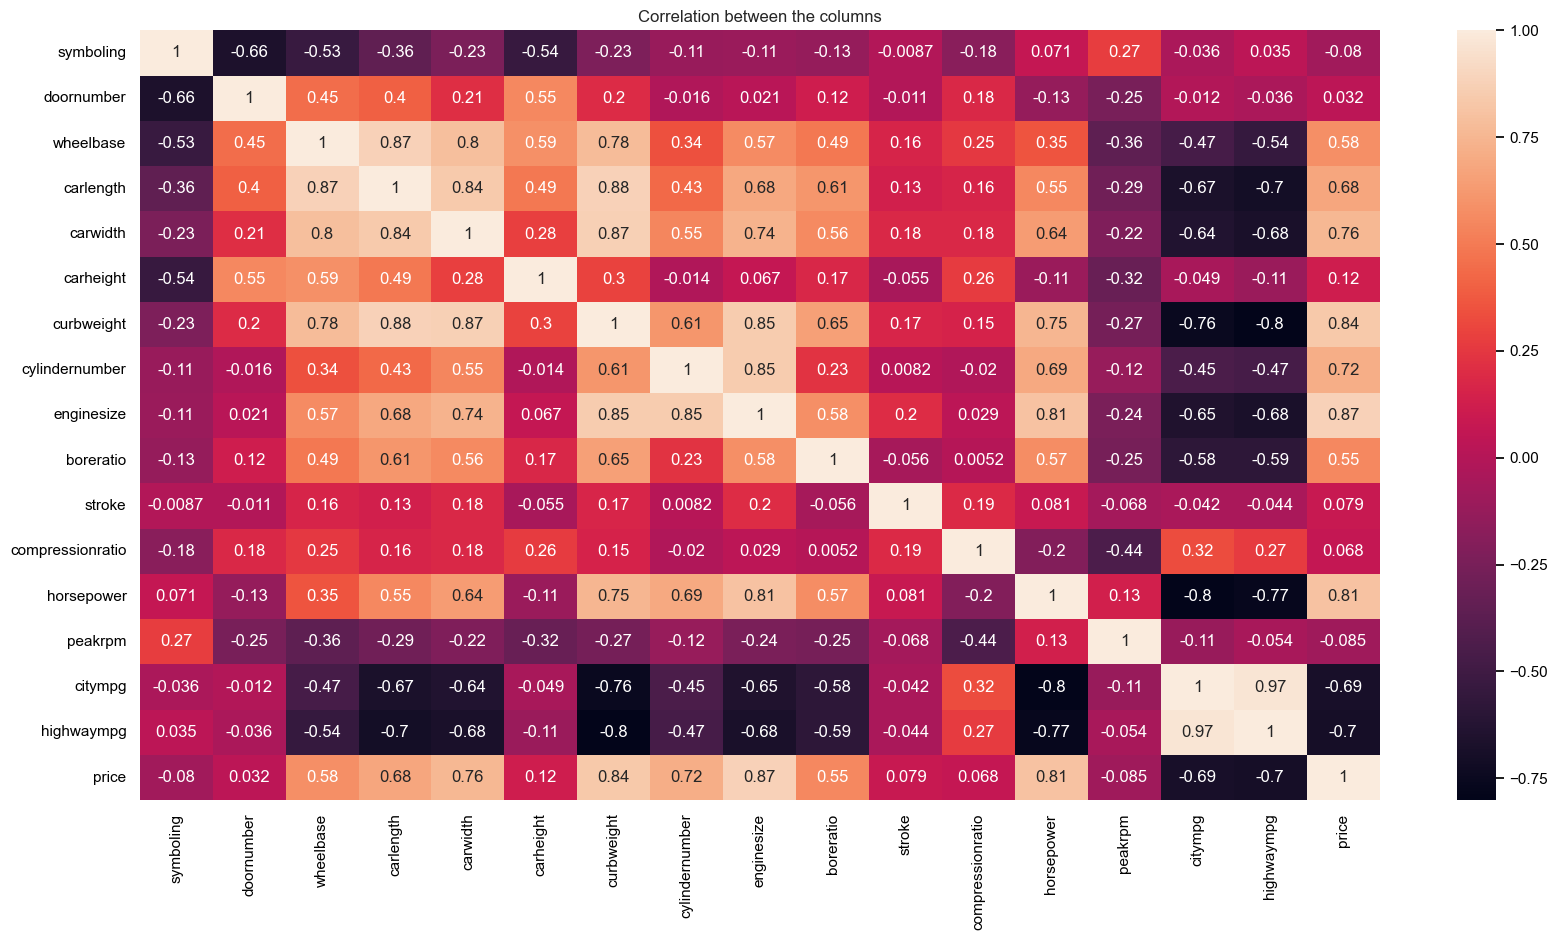

In [56]:
# Correlation heatmap after encoding
plt.figure(figsize=(20, 10))
sns.heatmap(car_data.select_dtypes(include = ['number']).corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

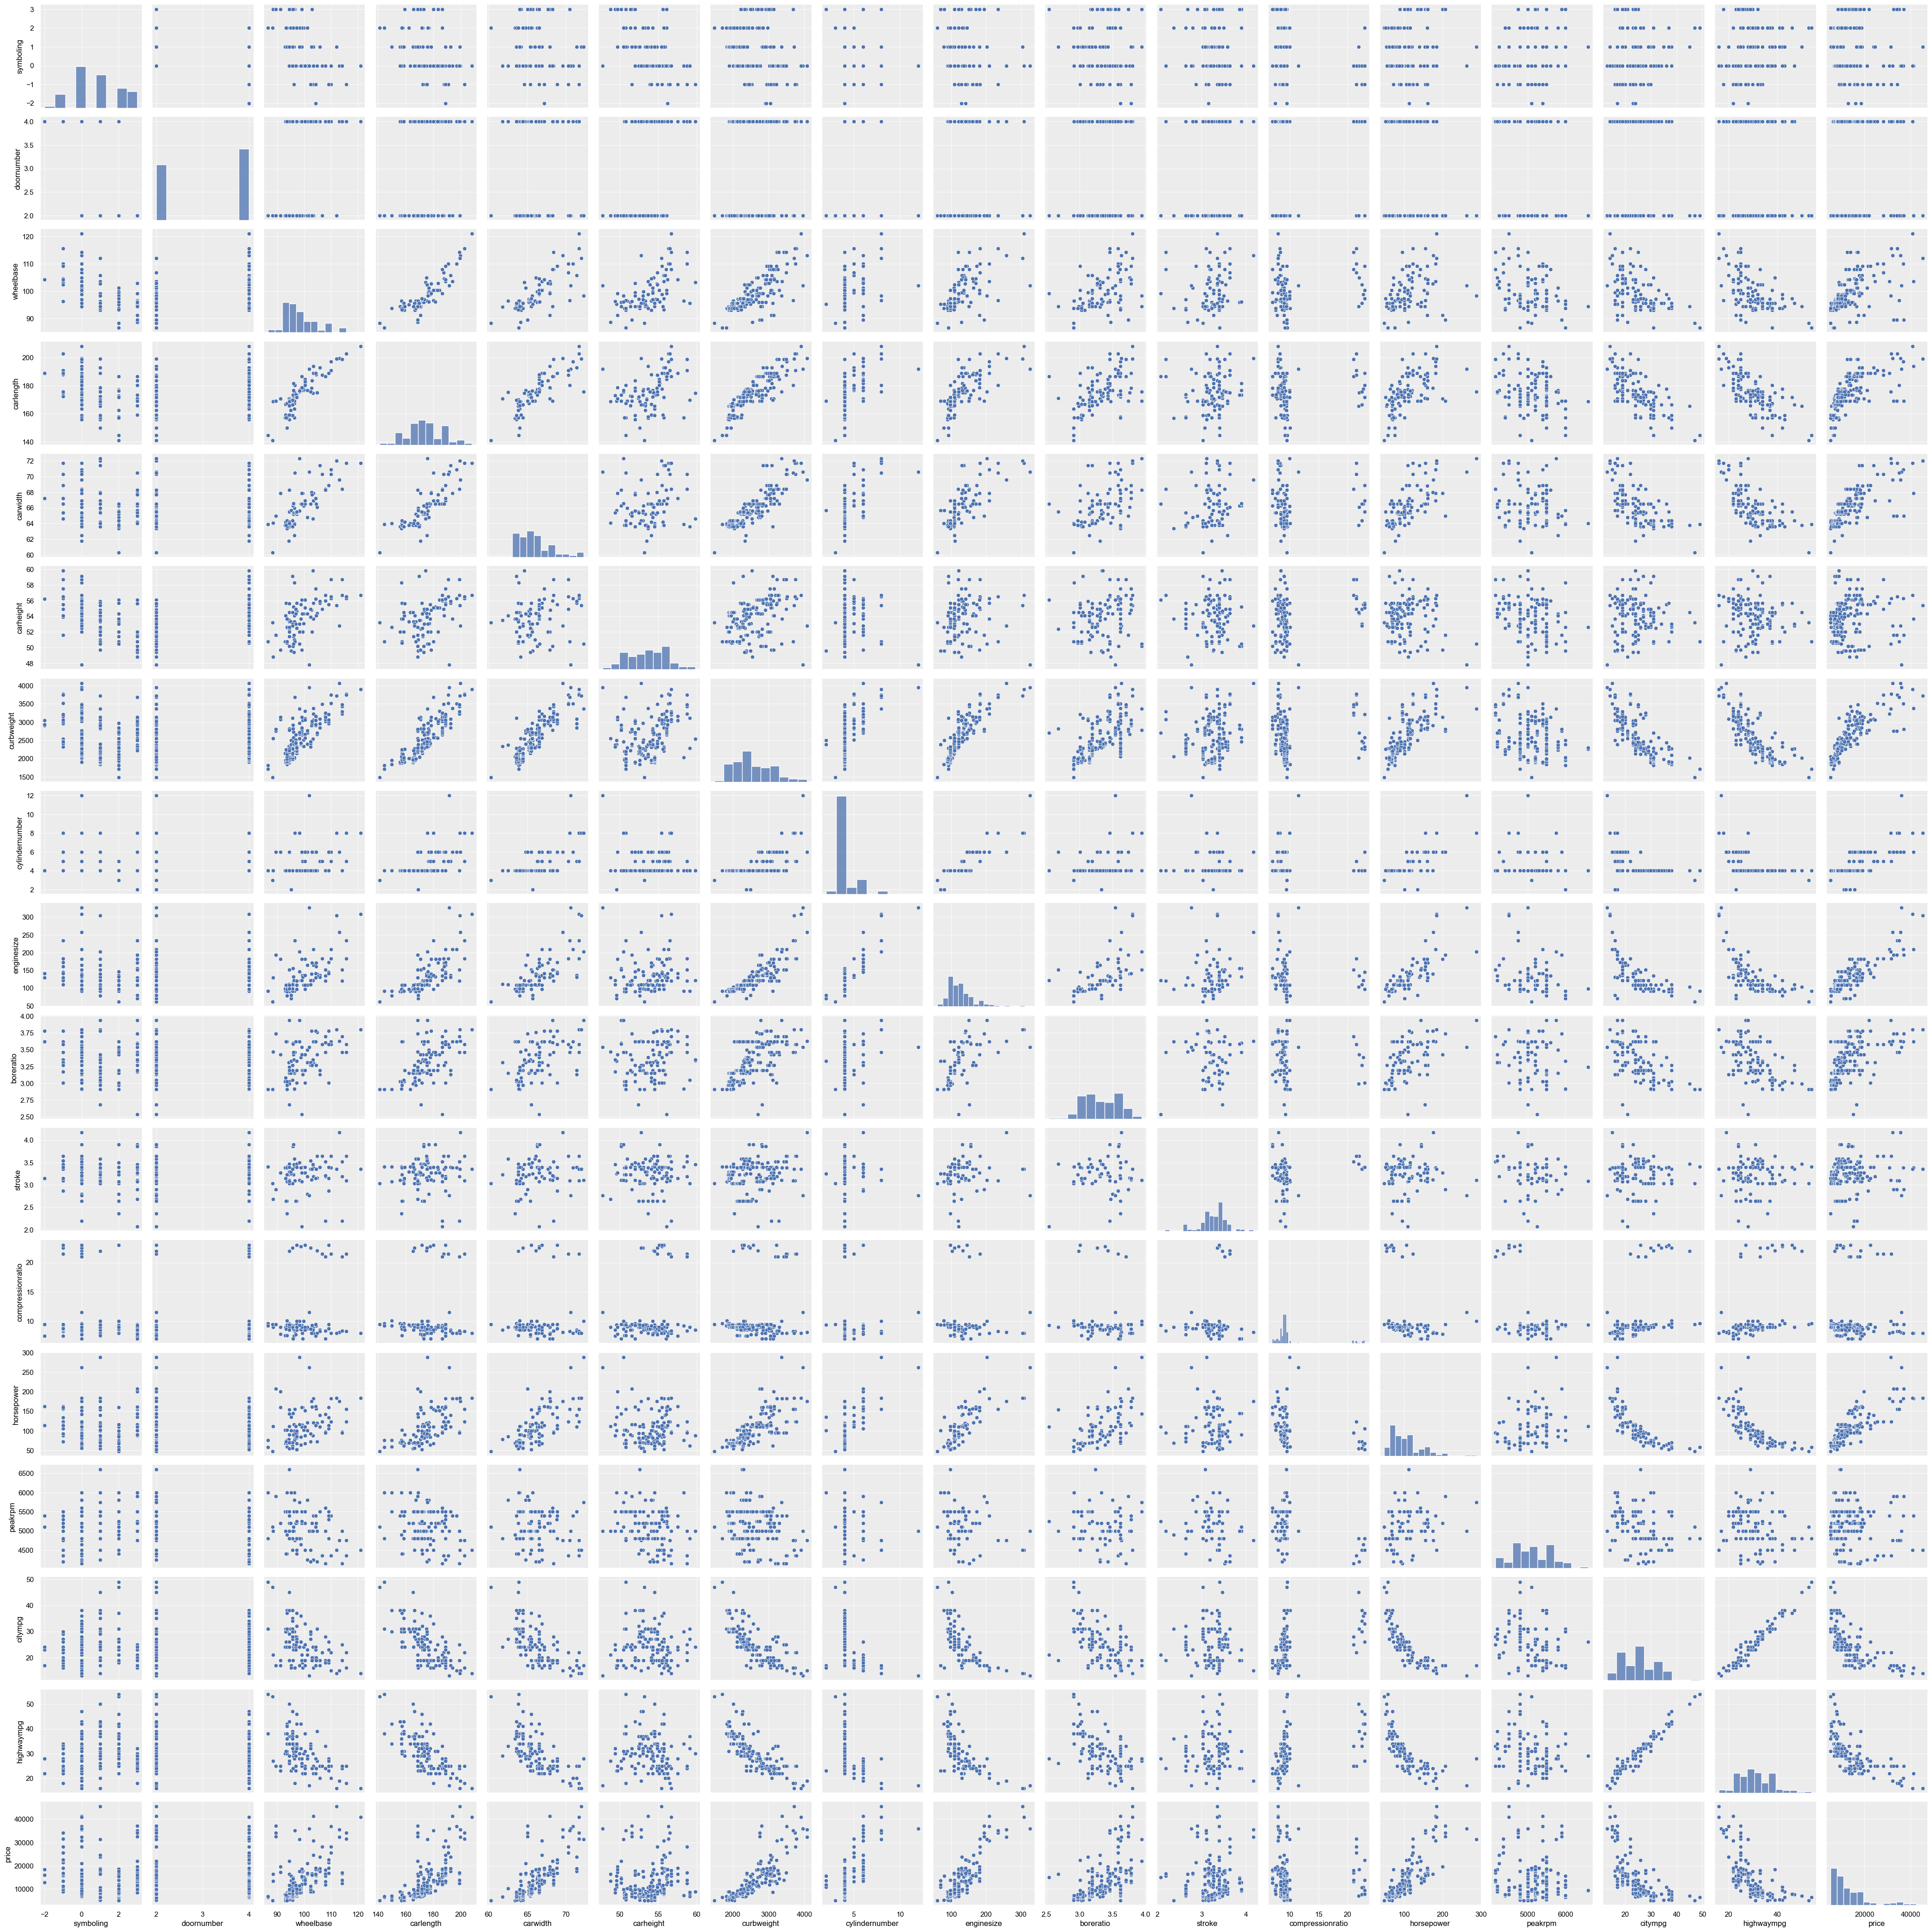

In [57]:
# Pairplot for the dataset
sns.pairplot(car_data)
plt.show()

In [59]:
# Split the dataset
x = data.drop(['CarName', 'price'], axis=1)
y = data['price']
x
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)

Shape of x is:  (205, 38)
Shape of y is:  (205,)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print("x_test shape: ", x_test.shape)
print("x_train shape: ", y_train.shape)

x_test shape:  (41, 38)
x_train shape:  (164,)


In [61]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
print(model.intercept_)
model.coef_
x.columns
pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])

13895.662603658535


Coefficients
symboling              549.058517
doornumber             380.594284
wheelbase              339.939245
carlength             -125.726775
carwidth              1454.711416
carheight              731.659013
curbweight            1725.785914
cylindernumber        1314.602536
enginesize            5974.648314
boreratio             -355.131847
stroke               -1502.812531
compressionratio     -7130.382142
horsepower            -404.672870
peakrpm               1364.003722
citympg                749.089372
highwaympg            1084.920327
fueltype_gas         -3334.269585
aspiration_turbo      1013.781750
carbody_hardtop       -538.075943
carbody_hatchback    -1972.073032
carbody_sedan        -1768.872864
carbody_wagon        -1733.799078
drivewheel_fwd         -45.473476
drivewheel_rwd         618.333703
enginelocation_rear   1259.777500
enginetype_dohcv       181.654432
enginetype_l          -580.166956
enginetype_ohc         886.643396
enginetype_ohcf         74.353665
enginetype_ohcv      -1267.180702
enginetype_rotor      1972.021990
fuelsystem_2bbl        -80.898491
fuelsystem_4bbl       -156.543125
fuelsystem_idi        3334.269585
fuelsystem_mfi        -295.146306
fuelsystem_mpfi         70.774375
fuelsystem_spdi       -718.001027
fuelsystem_spfi         20.966938

In [64]:
# Make predictions
prediction = model.predict(x_test)
prediction

array([ 5978.30586852, 11075.18124793, 20199.43876781,  6273.27363393,
       12411.16792084, 16244.13022988, 13758.51950762,  6082.36562571,
        8666.38102966,  6624.93152627, 14162.82346667, 16903.5607639 ,
        6484.31845627,  7131.97730973, 12111.770286  , 12853.56969431,
       10430.03535755,  9524.30216453,  6391.45212713,  6177.98859776,
        7811.0521323 ,  9809.45518468,  7618.29215008,  7308.75463016,
       13685.10192037, 32602.08339415,  4718.41339848,  6392.19236348,
        8934.73588118,  8288.33452209,  6632.90662628, 12736.75664034,
       21493.85617951,  9666.61956258, 17755.9021766 , 16950.94471779,
        7117.58500915,  4972.17380768, 11332.24109549, 10391.2065607 ,
        5294.16255347])

C:\Users\ghosh\AppData\Local\Temp\ipykernel_9552\1874193747.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - prediction))


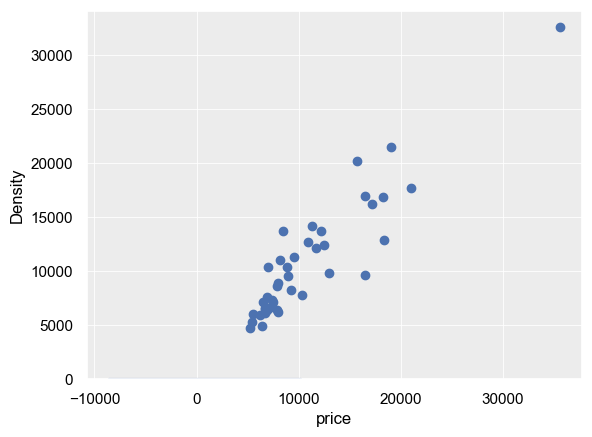

In [65]:
# Plot predictions
plt.scatter(y_test, prediction)
sns.distplot((y_test - prediction))
plt.show()

In [66]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE is: ", metrics.mean_absolute_error(prediction, y_test))
print("MSE is: ", metrics.mean_squared_error(prediction, y_test))
print("R^2 score is: ", metrics.r2_score(prediction, y_test))

MAE is:  1664.2584324083336
MSE is:  5392992.981325075
R^2 score is:  0.8202049958076132


In [67]:
# Calculate RMSE
RMSE = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(RMSE)
      
      

2322.281847951509
